# Sentiment Analysis Notebook

This notebook executes the sentiment analysis pipeline and visualizes the results.

**Steps:**
1.  **Run Pipeline:** Execute the `SentimentAnalysis` pipeline to process text and calculate VADER sentiment scores.
2.  **Analyze Results:** Explore the distribution of sentiments across different banks.
3.  **Visualize:** Create charts to understand customer sentiment trends.

In [20]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.sentiment import SentimentAnalysis
from src.config import DATA_PATHS

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 1. Run Sentiment Analysis Pipeline

We will initialize and run the `SentimentAnalysis` pipeline. This will:
1.  Load the preprocessed data.
2.  Perform additional text preparation (tokenization, lemmatization).
3.  Calculate VADER sentiment scores.
4.  Save the results.

In [21]:
# Initialize and run the pipeline
analyzer = SentimentAnalysis()
success = analyzer.run_pipeline()

if success:
    print("Pipeline executed successfully.")
else:
    print("Pipeline failed.")

STARTING SENTIMENT ANALYSIS PIPELINE
Loading processed data...
Loaded 1439 reviews

[1/2] Preprocessing for sentiment analysis...
Applying tokenization, stopword removal, and lemmatization...
Prepared data saved to: ../data/processed/reviews_for_sentiment.csv

[2/2] Running VADER Sentiment Analysis...
Calculating sentiment scores...

Sentiment Distribution:
sentiment_label
positive    60.389159
neutral     26.685198
negative    12.925643
Name: proportion, dtype: float64

Saving sentiment results...
Results saved to: ../data/processed/reviews_with_sentiment.csv

✓ Sentiment analysis completed successfully!
Pipeline executed successfully.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 2. Data Analysis & Visualization

Now that we have the sentiment scores, let's analyze the results. We will look at the distribution of sentiments and explore some examples.

In [22]:
# Load the results
results_path = DATA_PATHS['sentiment_results']
df_sentiment = pd.read_csv(results_path)

print(f"Loaded {len(df_sentiment)} analyzed reviews.")
df_sentiment.head()

Loaded 1439 analyzed reviews.


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_prepared_text,sentiment_score,sentiment_label
0,3463230e-f9f7-4be3-a632-fdd8d017ce84,🙏👍,5,2025-11-29,2025,11,Abyssinia,Abyssinia Bank,Yasin Alemu,0,2,Google Play,NaN,0.0000,neutral
1,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,2025,11,Abyssinia,Abyssinia Bank,Wariyo Dida,0,9,Google Play,good,0.4927,positive
2,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,2025,11,Abyssinia,Abyssinia Bank,Hailegebrail Tegegn,0,4,Google Play,goof,0.0000,neutral
3,11306fb9-5571-4950-8d32-604c5402242f,good!,5,2025-11-28,2025,11,Abyssinia,Abyssinia Bank,Tsegay ab,0,5,Google Play,good,0.4926,positive
4,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,2025,11,Abyssinia,Abyssinia Bank,Yohanis Fikadu,0,8,Google Play,good jop,0.4404,positive


C:\Users\yeget\AppData\Local\Temp\ipykernel_11556\2680938572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sentiment, x='sentiment_label', order=['negative', 'neutral', 'positive'], palette='viridis')


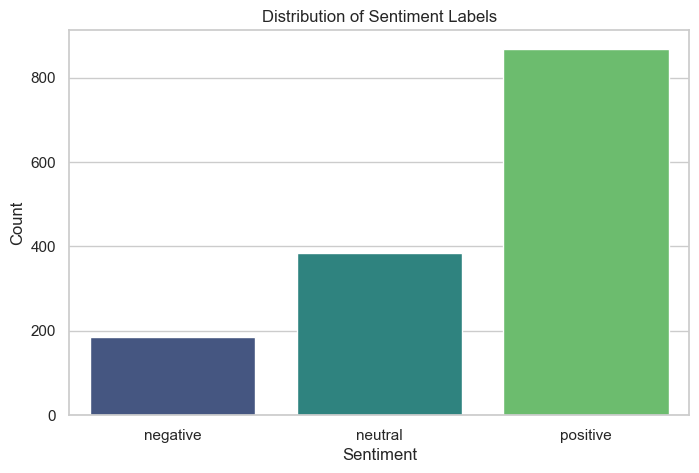

sentiment_label
positive    60.389159
neutral     26.685198
negative    12.925643
Name: proportion, dtype: float64


In [23]:
# Sentiment Label Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_sentiment, x='sentiment_label', order=['negative', 'neutral', 'positive'], palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print percentage distribution
print(df_sentiment['sentiment_label'].value_counts(normalize=True) * 100)

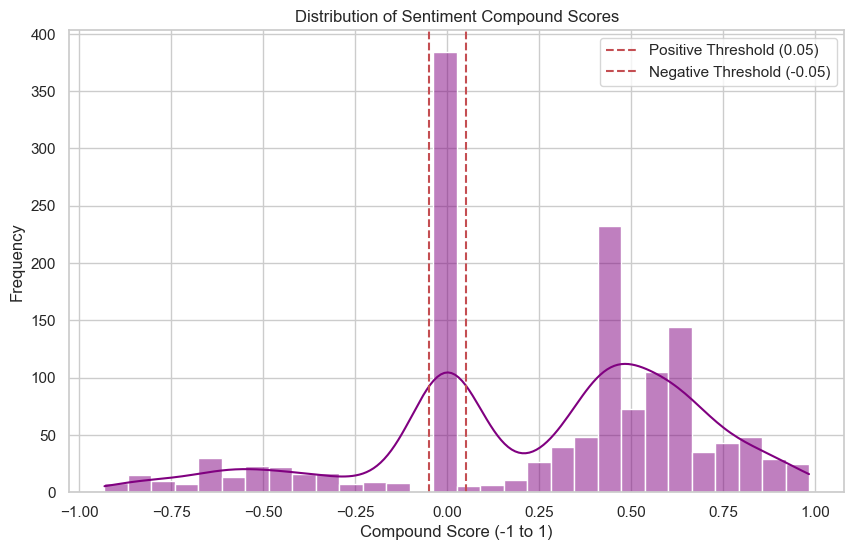

In [24]:
# Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_sentiment['sentiment_score'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sentiment Compound Scores')
plt.xlabel('Compound Score (-1 to 1)')
plt.ylabel('Frequency')
plt.axvline(x=0.05, color='r', linestyle='--', label='Positive Threshold (0.05)')
plt.axvline(x=-0.05, color='r', linestyle='--', label='Negative Threshold (-0.05)')
plt.legend()
plt.show()

In [25]:
# Sample Reviews
def print_samples(sentiment, n=3):
    print(f"\n--- Sample {sentiment.upper()} Reviews ---")
    samples = df_sentiment[df_sentiment['sentiment_label'] == sentiment]['review_text'].head(n)
    for i, text in enumerate(samples):
        print(f"{i+1}. {text}")

print_samples('positive')
print_samples('negative')
print_samples('neutral')


--- Sample POSITIVE Reviews ---
1. Very Good
2. good!
3. good jop

--- Sample NEGATIVE Reviews ---
1. bad exprience...it is so crushed
2. not user friendly at all it requires a huge connectivity and also lags many times 😑😑😑
3. It keeps notifying me to disable developer options and quiet while I'm not enabled. always bring another type of problem with new updates.

--- Sample NEUTRAL Reviews ---
1. 🙏👍
2. goof
3. most of the time is not working properly


## 3. Sentiment vs. Star Rating

We will analyze how the calculated sentiment score correlates with the user's star rating (1-5 stars). We expect higher star ratings to have higher positive sentiment scores. We will visualize this for each bank.

C:\Users\yeget\AppData\Local\Temp\ipykernel_11556\1849441701.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax=axes[i], palette='RdBu')
C:\Users\yeget\AppData\Local\Temp\ipykernel_11556\1849441701.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax=axes[i], palette='RdBu')
C:\Users\yeget\AppData\Local\Temp\ipykernel_11556\1849441701.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax

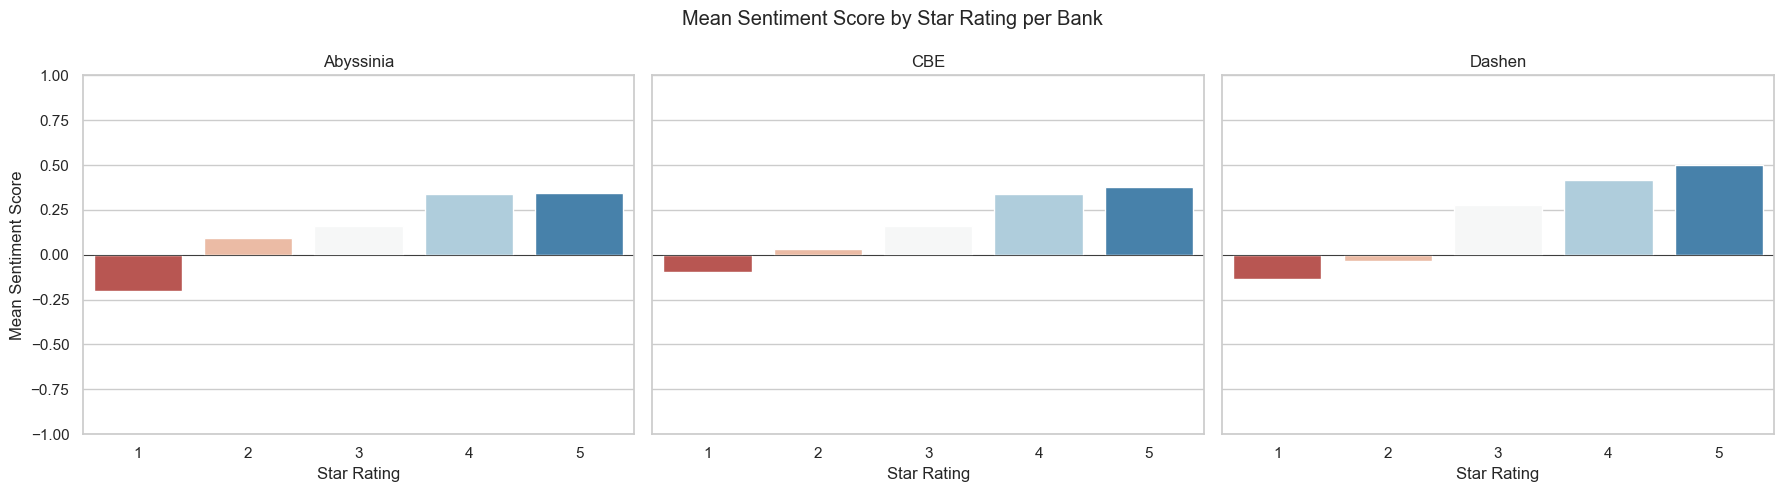

In [27]:
# Calculate mean sentiment score by Bank and Rating
# Note: Assuming 'bank_id' is the column name for the bank identifier. 
# If your column is named differently (e.g., 'app_id', 'bank_name'), please adjust accordingly.
sentiment_by_rating = df_sentiment.groupby(['bank_code', 'rating'])['sentiment_score'].mean().reset_index()

# Get unique banks
banks = df_sentiment['bank_code'].unique()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Mean Sentiment Score by Star Rating per Bank')

for i, bank in enumerate(banks):
    # Filter data for the bank
    bank_data = sentiment_by_rating[sentiment_by_rating['bank_code'] == bank]
    
    # Plot
    sns.barplot(data=bank_data, x='rating', y='sentiment_score', ax=axes[i], palette='RdBu')
    
    axes[i].set_title(bank)
    axes[i].set_xlabel('Star Rating')
    axes[i].set_ylabel('Mean Sentiment Score')
    axes[i].axhline(0, color='black', linewidth=0.5) # Zero line
    axes[i].set_ylim(-1, 1) # Set y-axis to full VADER range for better context

plt.tight_layout()
plt.show()